In [2]:
import uproot
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from functions import root_to_DF



index       = [ "B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE", "thrustAxisCosTheta","aplanarity","sphericity",
                "harmonicMomentThrust0","harmonicMomentThrust1","harmonicMomentThrust2","harmonicMomentThrust3","harmonicMomentThrust4",
                "foxWolframR1","foxWolframR2","foxWolframR3","foxWolframR4", "B_sig_isSignalAcceptMissingNeutrino"]



namen = ["data","charged","mixed","uu","cc","dd","ss"]







df = pd.read_csv("/work/aavocone/small_set.csv")



# Class_weight vs weight

class_weight: $\frac{n_{all}}{bincount(n_{all})\:*\:n_{classes}}$

sample_weight = class_weight but as an array with len = len(df)

In [8]:
from sklearn.utils import class_weight as cw
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split



#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)

weight = (len(ytest)-sum(ytest))/sum(ytest)

#train with scale_pos_weights
xgbc_sample_weight     = XGBClassifier(n_estimators = 5, learning_rate = 0.2, eval_metric = "logloss", scale_pos_weight = weight, use_label_encoder =False)
xgbc_sample_weight.fit(xtrain,ytrain)




/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=128,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=212.63855421686748,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## Plot probability hist and efficiency

### get bins, histogram and efficiency

In [9]:
from functions import efficiency

#probability prediction for ytrain/ytest for both models

ytrain_predict_sample = xgbc_sample_weight.predict_proba(xtrain)[:,1]
ytest_predict_sample = xgbc_sample_weight.predict_proba(xtest)[:,1]


#get histograms and efficiency
ss_train_hist, bs_train_hist, ss_train_eff, bs_train_eff, bin_edges = efficiency(ytrain_predict_sample, ytrain)
ss_test_hist, bs_test_hist, ss_test_eff, bs_test_eff, bin_edges = efficiency(ytest_predict_sample, ytest)



### Histograms

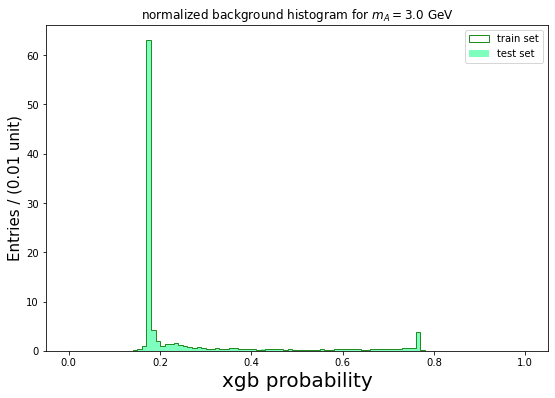

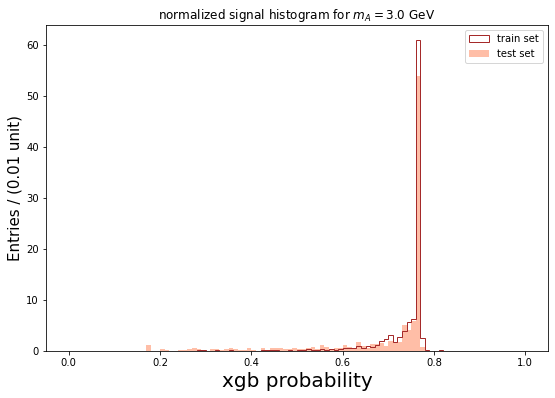

In [10]:
#Background
#train set
plt.figure(figsize=(9,6))
plt.hist(bs_train_hist,bins = bin_edges, density=True, histtype="step", label = "train set", color = "forestgreen")
plt.hist(bs_test_hist,bins = bin_edges, density=True, histtype="stepfilled", label = "test set", alpha = 0.5, color = "springgreen")




plt.title(f"normalized background histogram for $m_A = 3.0$ GeV")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.savefig(f"/work/aavocone/week4/background_test_train.jpeg")
plt.show() 


#signal
plt.figure(figsize=(9,6))
plt.hist(ss_train_hist,bins = bin_edges, density=True, histtype="step", label = "train set", color = "brown")
plt.hist(ss_test_hist,bins = bin_edges, density=True, histtype="stepfilled", label = "test set", color = "coral", alpha = 0.5)
plt.title(f"normalized signal histogram for $m_A = 3.0$ GeV")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.savefig(f"/work/aavocone/week4/signal_test_train.jpeg")
plt.show() 



[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


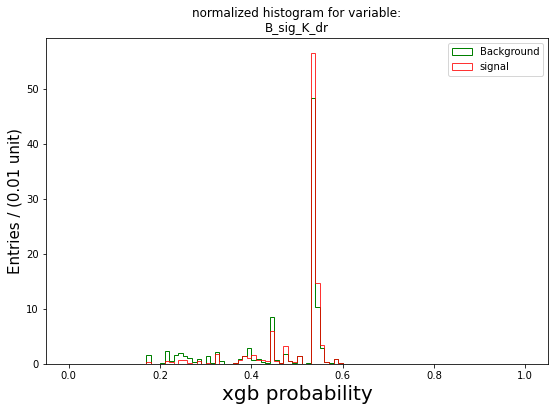

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


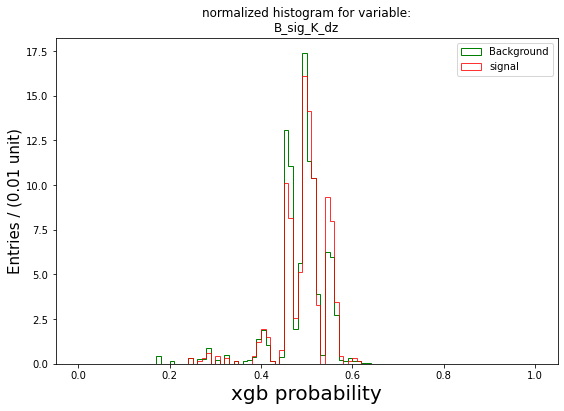

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


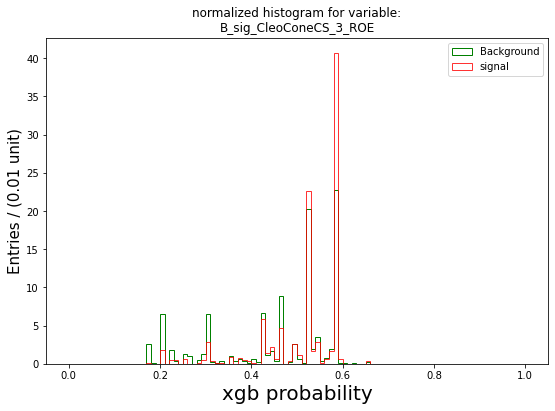

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


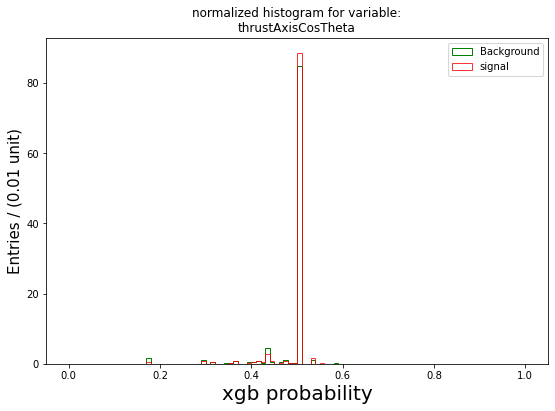

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


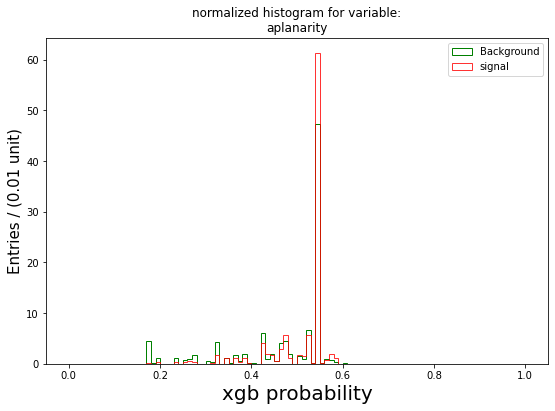

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


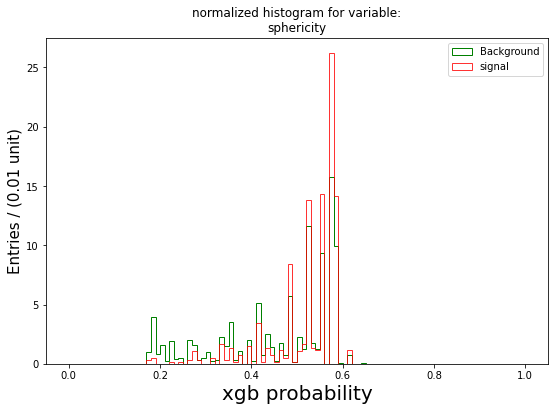

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


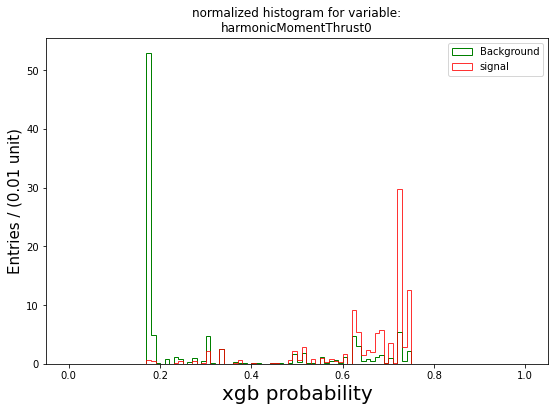

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


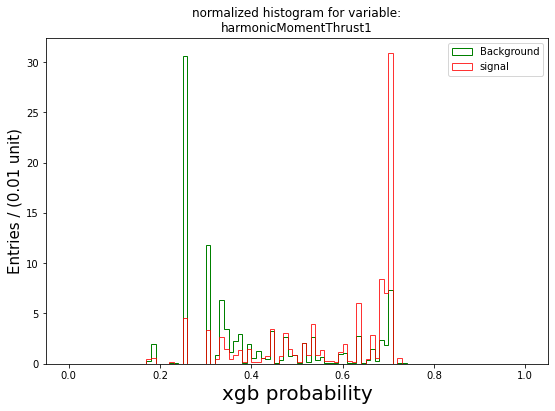

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


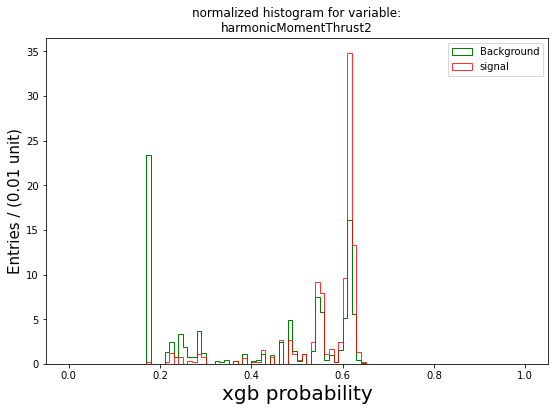

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


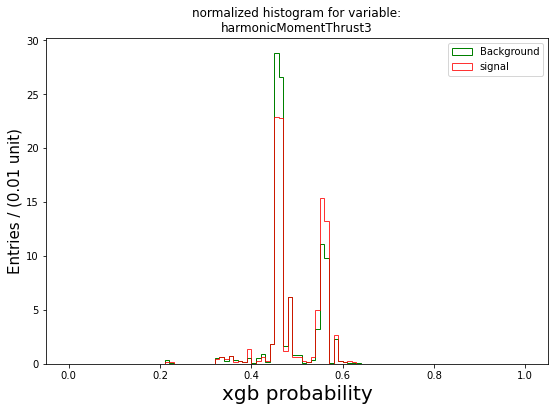

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


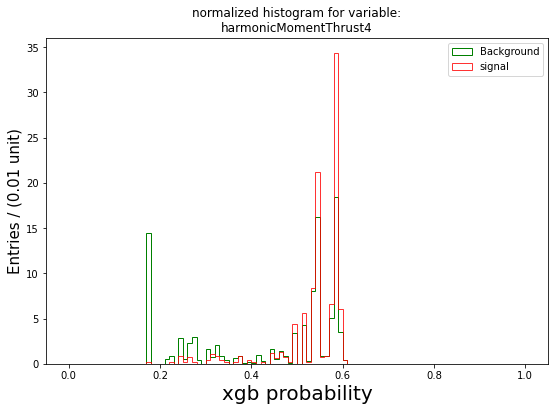

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


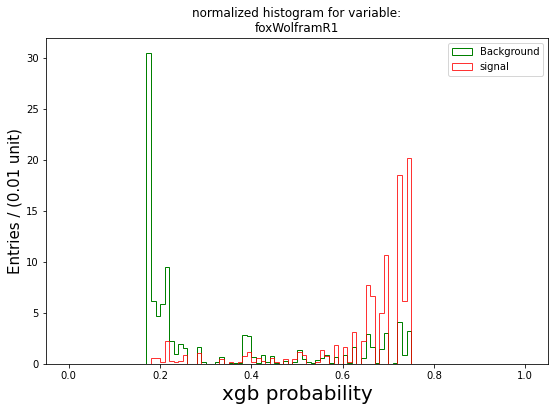

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


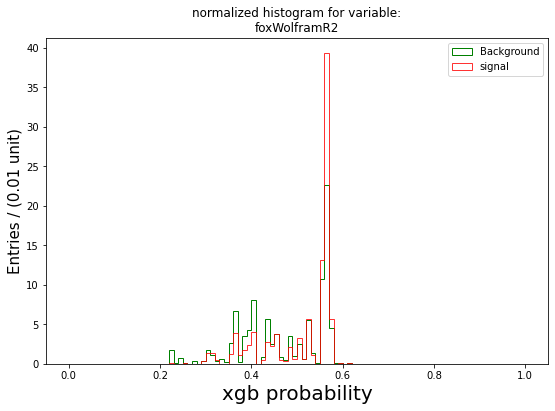

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


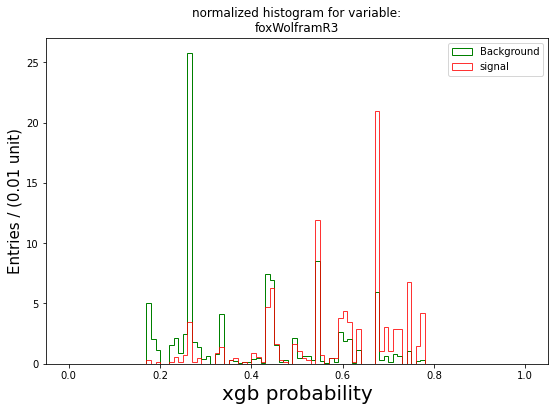

[  0.50235297 106.74870274]


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


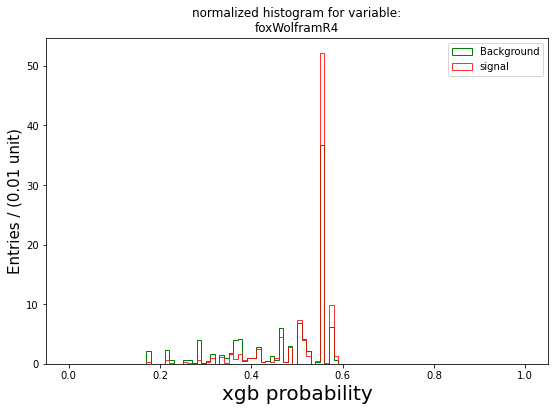

In [ ]:
for number in range(len(df.columns)-3):
    #test train split
    X = df[[df.columns[number]]]   #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
    y = df["signal"]            
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)

    #train with class_weights
    weights = cw.compute_sample_weight(class_weight="balanced",y = ytrain)
    print(np.unique(weights))
    xgbc   = XGBClassifier(n_estimators = 5, learning_rate = 0.2, eval_metric = "logloss", use_label_encoder =False)
    xgbc.fit(xtrain,ytrain, sample_weight = weights)

    #probability prediction for ytrain/ytest for both models


    y_prob = xgbc.predict_proba(xtest)


    #get histograms and efficiency
    shist,bhist,seff,beff, bin_edges = efficiency(y_prob, ytest)

    plt.figure(figsize=(9,6))
    plt.hist(bhist,bins = bin_edges, density=True, histtype="step", label = "Background", color = "g")
    plt.hist(shist,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r", alpha = 0.8)
    plt.title(f"normalized histogram for variable:\n{index[number]}")
    plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
    plt.xlabel("xgb probability", fontsize = 20)
    plt.legend()
    plt.savefig(f"/work/aavocone/week4/hist_{index[number]}.jpeg")
    plt.show() 
        

   
    

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Feature importance calculated by xgbclassifier:
B_sig_K_dr :  0.033527788
B_sig_K_dz :  0.011133267
B_sig_CleoConeCS_3_ROE :  0.025478216
thrustAxisCosTheta :  0.019660046
aplanarity :  0.07829817
sphericity :  0.061844666
harmonicMomentThrust0 :  0.5134027
harmonicMomentThrust1 :  0.014506775
harmonicMomentThrust2 :  0.02558679
harmonicMomentThrust3 :  0.009442058
harmonicMomentThrust4 :  0.012511135
foxWolframR1 :  0.1208507
foxWolframR2 :  0.014144258
foxWolframR3 :  0.022556592
foxWolframR4 :  0.037056807


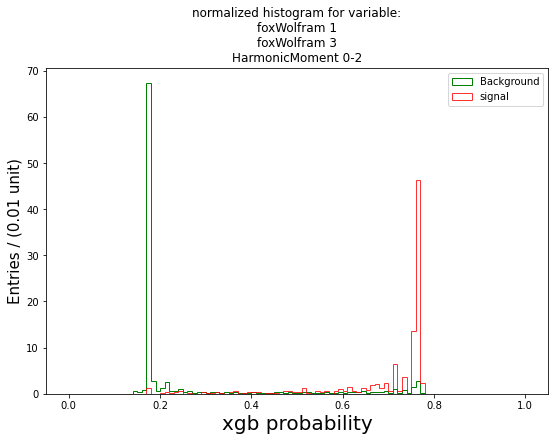

In [ ]:
X = df[[ "B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE", "thrustAxisCosTheta","aplanarity","sphericity",
                "harmonicMomentThrust0","harmonicMomentThrust1","harmonicMomentThrust2","harmonicMomentThrust3","harmonicMomentThrust4",
                "foxWolframR1","foxWolframR2","foxWolframR3","foxWolframR4"]]   
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)

#train with class_weights

xgbc   = XGBClassifier(n_estimators = 5, learning_rate = 0.2, eval_metric = "logloss", use_label_encoder =False)
model_fit = xgbc.fit(xtrain,ytrain, sample_weight = weights)


#combine 2 list to 1 dict
feature_list = model_fit.feature_importances_
feature_dict = {index[i]: feature_list[i] for i in range(len(index[:-2]))}
print("Feature importance calculated by xgbclassifier:")
for key,values in feature_dict.items():
    print(key,": ", values)

#probability prediction for ytrain/ytest for both models
y_prob = xgbc.predict_proba(xtest)


#get histograms and efficiency
shist,bhist,seff,beff, bin_edges = efficiency(y_prob, ytest)

plt.figure(figsize=(9,6))
plt.hist(bhist,bins = bin_edges, density=True, histtype="step", label = "Background", color = "g")
plt.hist(shist,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r", alpha = 0.8)
plt.title(f"normalized histogram for variable:\nfoxWolfram 1\nfoxWolfram 3\nHarmonicMoment 0-2")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig(f"/work/aavocone/week4/hist_exclusive.jpeg")
plt.show() 